In [66]:
import os
import urllib, cStringIO

from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns

import numpy as np
from __future__ import division
import scipy.stats as stats
import tabular as tb
import pandas
import json

from PIL import Image
import base64


In [63]:
# directory & file hierarchy
analysis_dir = '/Users/judithfan/reference_games/analysis/sketchpad'
data_dir = '/Users/judithfan/reference_games/data/sketchpad'
exp_dir = '/Users/judithfan/reference_games/experiments/sketchpad'

clickedObj_dir = os.path.join(data_dir,'clickedObj')
stroke_dir = os.path.join(data_dir,'stroke')

# get data files
click_files = [i for i in os.listdir(clickedObj_dir) if i[-3:]=='csv']
stroke_files = [i for i in os.listdir(stroke_dir) if i[-3:]=='csv']

In [29]:
# load in single subject clickedObj file
X = tb.tabarray(SVfile=os.path.join(clickedObj_dir,click_files[0]))

Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).


In [36]:
#### TODO: Save full image URL for each of the targets so you get category, object, viewpoint information
# get column names
print X.metadata['names']

['gameid', 'time', 'trialNum', 'intendedTarget', 'clickedObject', 'outcome', 'object1Name', 'object1SketcherLoc', 'object1ViewerLoc', 'object2Name', 'object2SketcherLoc', 'object2ViewerLoc', 'object3Name', 'object3SketcherLoc', 'object3ViewerLoc', 'object4Name', 'object4SketcherLoc', 'object4ViewerLoc', 'png']


In [135]:
stimFile = os.path.join(exp_dir,'stimList_subord.js')
with open(stimFile) as f:
    stimList = json.load(f)

def get_canonical(category):    
    stimFile = os.path.join(exp_dir,'stimList_subord.js')
    with open(stimFile) as f:
        stimList = json.load(f)    
    allviews = [i['filename'] for i in stimList if i['basic']==category]
    canonical = [a for a in allviews if a[-8:]=='0035.png']    
    return canonical

canonical_birds = get_canonical('birds')
canonical_cars = get_canonical('cars')
canonical_chairs = get_canonical('chairs')
canonical_dogs = get_canonical('dogs')

def get_subord_names(category):
    full_names = get_canonical(category)    
    return [c.split('_')[2] for c in full_names]

def build_url_from_filename(category):
    full_names = get_canonical(category)
    url_prefix = 'https://s3.amazonaws.com/sketchloop-images-subord/'
    urls = []
    for f in full_names:
        urls.append(url_prefix + f)
    return urls

In [149]:
bird_urls = build_url_from_filename('birds')
bird_subords = get_subord_names('birds')
bird_dict = dict(zip(bird_subords,bird_urls))

car_urls = build_url_from_filename('cars')
car_subords = get_subord_names('cars')
car_dict = dict(zip(car_subords,car_urls))

chair_urls = build_url_from_filename('chairs')
chair_subords = get_subord_names('chairs')
chair_dict = dict(zip(chair_subords,chair_urls))

dog_urls = build_url_from_filename('dogs')
dog_subords = get_subord_names('dogs')
dog_dict = dict(zip(dog_subords,dog_urls))

full_dict = dict(bird_dict,**car_dict)
full_dict.update(chair_dict)
full_dict.update(dog_dict)

Viewer clicked the: sparrow
(correct)


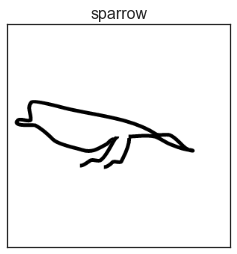

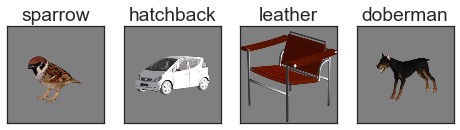

In [173]:
# get single trial sketch
t = X[6] 
imgData = t['png']
filestr = base64.b64decode(imgData)
fname = 'sketch.png'
with open(fname, "wb") as fh:
    fh.write(imgData.decode('base64'))
textsize = 16

# first plot the target
im = Image.open(fname)
fig = plt.figure(figsize=(4,4))
p = plt.subplot(1,1,1)
plt.imshow(im)
sns.set_style('white')
k = p.get_xaxis().set_ticklabels([])
k = p.get_yaxis().set_ticklabels([])
k = p.get_xaxis().set_ticks([])
k = p.get_yaxis().set_ticks([])
targetname = t['intendedTarget']
distractors = [t['object2Name'],t['object3Name'],t['object4Name']]
full_list = [t['intendedTarget'],t['object2Name'],t['object3Name'],t['object4Name']] 
outcome = t['outcome']
response = t['clickedObject']
plt.title(targetname,fontsize=textsize)

print 'Viewer clicked the: ' + response
if outcome==1:
    print '(correct)'
elif outcome==0:
    print '(incorrect)'

fig = plt.figure(figsize=(8,3))
for (i,d) in enumerate(full_list):
    URL = full_dict[d]
    file = cStringIO.StringIO(urllib.urlopen(URL).read())
    img = Image.open(file)
    p = plt.subplot(1,4,i+1)
    plt.imshow(img)
    p.get_xaxis().set_ticklabels([])
    p.get_yaxis().set_ticklabels([])
    p.get_xaxis().set_ticks([])
    p.get_yaxis().set_ticks([])
    p.set_aspect('equal')   
    plt.title(d)

In [89]:
def plot_from_url(URL):
    file = cStringIO.StringIO(urllib.urlopen(URL).read())
    img = Image.open(file)    
    

In [117]:
def plot_gallery(category):
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    plt.figure(figsize = (8,8))
    gs1 = gridspec.GridSpec(8, 8)
    gs1.update(wspace=0.025, hspace=0.05)

    url_prefix = 'https://s3.amazonaws.com/sketchloop-images-subord/'
    for (i,c) in enumerate(category):
        URL = url_prefix + c
        file = cStringIO.StringIO(urllib.urlopen(URL).read())
        img = Image.open(file)
        p = plt.subplot(3,3,i+1)
        plt.imshow(img)
        p.get_xaxis().set_ticklabels([])
        p.get_yaxis().set_ticklabels([])
        p.get_xaxis().set_ticks([])
        p.get_yaxis().set_ticks([])
        p.set_aspect('equal')
        subord = c.split('_')[2]
        plt.title(subord)
    plt.tight_layout()


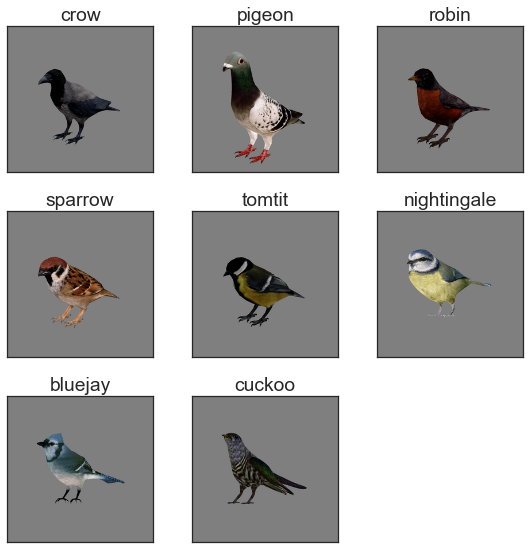

In [118]:
plot_gallery(canonical_birds)

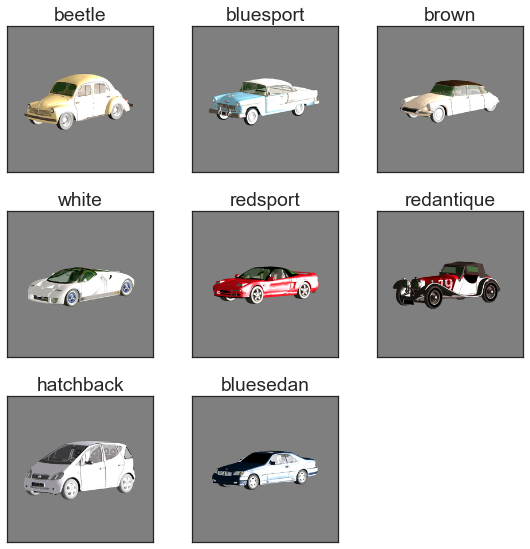

In [119]:
plot_gallery(canonical_cars)

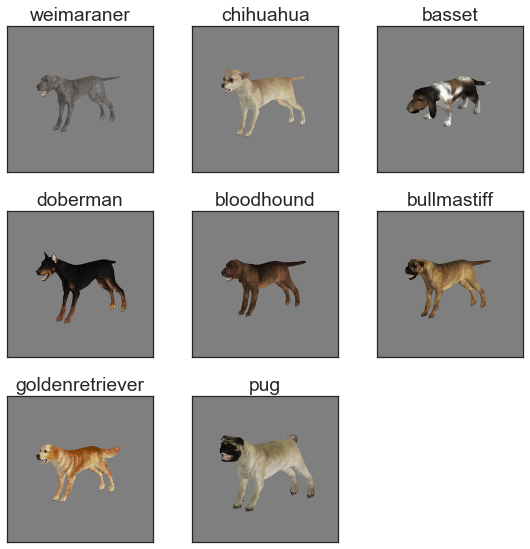

In [120]:
plot_gallery(canonical_dogs)

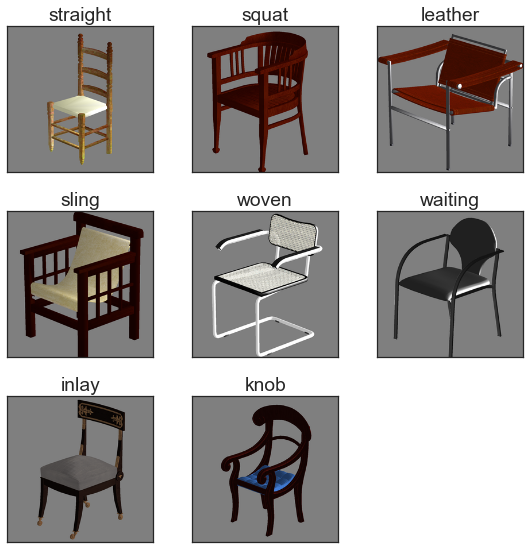

In [121]:
plot_gallery(canonical_chairs)